In [1]:
#Exploratory Data Analysis 
import pandas as pd

#Example for loading one of the CSV files
file_path = "./downloads/TrainTestData/semeval-2013-train-all.csv"
data = pd.read_csv(file_path, sep='delimiter', quotechar='"', error_bad_lines=False)

#Display the first few rows of the dataframe
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6548\942224929.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, sep='delimiter', quotechar='"', error_bad_lines=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6548\942224929.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file_path, sep='delimiter', quotechar='"', error_bad_lines=False)


,label\ttext
0,1\tOne Night like In Vegas I make dat Nigga Fa...
1,1\tWalking through Chelsea at this time of day...
2,"0\t""And on the very first play of the night, A..."
3,"0\t""Drove the bike today, about 40 miles. Felt..."
4,-1\tlooking at the temp outside....hpw did it ...


In [2]:
# Basic info about the dataset
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58655 entries, 0 to 58654
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label	text  58655 non-null  object
dtypes: object(1)
memory usage: 458.4+ KB
None
                                              label\ttext
count                                               58655
unique                                              58642
top     1\tPerseverance is failing 19 times and succee...
freq                                                    4
label\ttext    0
dtype: int64


In [3]:
#Statistical summary and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of numerical columns
print(data.describe())

                                              label\ttext
count                                               58655
unique                                              58642
top     1\tPerseverance is failing 19 times and succee...
freq                                                    4


In [4]:
print(data.columns)

Index(['label\ttext'], dtype='object')


In [5]:
# Statistical summary of sentiment labels
data.columns = data.columns.str.strip()
print(data.columns)

Index(['label\ttext'], dtype='object')


In [6]:
#Since the labels label and text are identified as one we perform this step 
data = pd.read_csv(file_path, sep='\t') 

print(data.head())
print(data.columns)

   label                                               text
0      1    One Night like In Vegas I make dat Nigga Famous
1      1  Walking through Chelsea at this time of day is...
2      0  And on the very first play of the night, Aaron...
3      0  Drove the bike today, about 40 miles. Felt lik...
4     -1  looking at the temp outside....hpw did it get ...
Index(['label', 'text'], dtype='object')


In [7]:
# Statistical summary of sentiment labels
print(data['label'].value_counts())

 0    26633
 1    20580
-1    11049
Name: label, dtype: int64


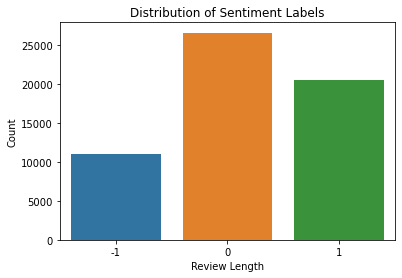

In [8]:
#Visualizing the distribution of the sentiment labels
sns.countplot(x='label', data=data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

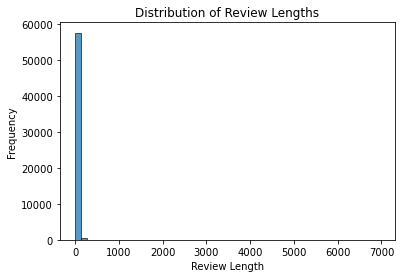

In [9]:
#Analyze the length of the reviews 
data['review_length'] = data['text'].apply(len)
sns.histplot(data['review_length'], bins=50, kde=False)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

#Text cleaning
data['cleaned_text'] = data['text'].str.lower().str.replace('[^\w\s]', ' ' )

C:\Users\DELL\AppData\Local\Temp\ipykernel_6548\1874881545.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_text'] = data['text'].str.lower().str.replace('[^\w\s]', ' ' )


In [11]:
#Tokenization (making an assumption that each word is separated by a space)
data['tokens'] = data['cleaned_text'].str.split()

In [12]:
import nltk

#Download the stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# Stop words removal
stop = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in stop])

In [14]:
#Lemmatizaton of the dataset
lemmatizer = WordNetLemmatizer()
data['lemmatizer'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

In [15]:
#Vectorization (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000) #here we are limiting the number of features to 1000

# Fit the vectorizer to the cleaned text and transform the text into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [16]:
#Now that it's fit you can get the feature names 
feature_names = tfidf_vectorizer.get_feature_names_out()

In [17]:
#Viewing the preprocessed data
data.head()

,label,text,review_length,cleaned_text,tokens,lemmatizer
0,1,One Night like In Vegas I make dat Nigga Famous,47,one night like in vegas i make dat nigga famous,"[one, night, like, vegas, make, dat, nigga, fa...","[one, night, like, vega, make, dat, nigga, fam..."
1,1,Walking through Chelsea at this time of day is...,85,walking through chelsea at this time of day is...,"[walking, chelsea, time, day, rather, lovely, ...","[walking, chelsea, time, day, rather, lovely, ..."
2,0,"And on the very first play of the night, Aaron...",130,and on the very first play of the night aaron...,"[first, play, night, aaron, rodgers, int, udfa...","[first, play, night, aaron, rodgers, int, udfa..."
3,0,"Drove the bike today, about 40 miles. Felt lik...",82,drove the bike today about 40 miles felt lik...,"[drove, bike, today, 40, miles, felt, like, ji...","[drove, bike, today, 40, mile, felt, like, jim..."
4,-1,looking at the temp outside....hpw did it get ...,121,looking at the temp outside hpw did it get ...,"[looking, temp, outside, hpw, get, hotter, sun...","[looking, temp, outside, hpw, get, hotter, sun..."


In [18]:
#Feature engineering - transforming textual information to numerical data

In [19]:
#Convert a sparse martix to a dataframe
feature_names = tfidf_vectorizer.get_feature_names_out()

#Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

In [20]:
#Length of reviews feature
tfidf_df['review_length'] = data['review_length']

In [21]:
from sklearn.model_selection import train_test_split

#Assuming 'label' is the target variable and 'tfidf_df' contains the feature set

X = tfidf_df #Feature
y = data['label'] #Target Variable

#Split the data into trainging and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#By this point the data is split for training and testing.
#X_train and y_train will be used for the training the machine learning models, while X_test and x_train will be used for evaluating the model

In [22]:
#Model training step
from sklearn.naive_bayes import MultinomialNB

#Initialize the classifier
clf = MultinomialNB()

#Train the classifier
clf.fit(X_train, y_train)

MultinomialNB()

In [23]:
#Evaluate the model 
from sklearn.metrics import classification_report, accuracy_score

#Make predictions on the test set
y_pred = clf.predict(X_test)

#Evaluate the predictions
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.18      0.28      2272
           0       0.56      0.80      0.66      5262
           1       0.67      0.55      0.60      4119

    accuracy                           0.59     11653
   macro avg       0.61      0.51      0.51     11653
weighted avg       0.60      0.59      0.56     11653

Accuracy:  0.5917789410452244


In [24]:
#The models overall accuracy by this point is 59.18% and the macro avg, wieghted avg scores provide different types of avgs for recall, precision, and f1-score
#The macro average calculates the metrics for each label and finds their unweighted mean. 
#The weighted average calculates the metrics for each label, and finds their average weighted by support.

#The precision for class -1 is 0.59 which means that when the model predicts class -1 it is correct 59% of the time 
#The recall for class 0 is 0.80 which means that the model is able to find 80% of all actual class 0 instances
#f1-score for class 1 is 0.60 which is the harmonic mean of precision and recall for that class

Text(33.0, 0.5, 'True')

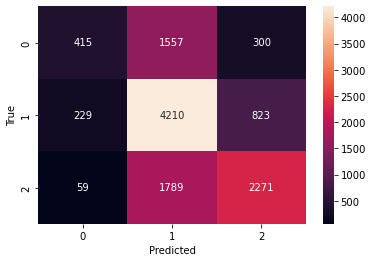

In [25]:
#Confusion matrix for the purpose of checking on how the model works for each class 
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [26]:
#Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

#Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

#Initialize the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

#Perform the grid search with the training data
grid_search.fit(X_train, y_train)

#Get the best parameters 
print("Best paramters: ", grid_search.best_params_)

Best paramters:  {'alpha': 0.1}


In [27]:
#Now lets retrain the model with the optimal hyperparameters

#Retrain your classifier with the optimal alpha value
optimal_clf = MultinomialNB(alpha=0.1)
optimal_clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [28]:
#Next we shall re-evaluate the performance of the model

#Make predictions with the optimized model
optimal_y_pred = optimal_clf.predict(X_test)

#Evaluate the optimized predictions
print(classification_report(y_test, optimal_y_pred))
print("Optimized Accuracy: ", accuracy_score(y_test, optimal_y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.20      0.30      2272
           0       0.56      0.79      0.66      5262
           1       0.67      0.55      0.61      4119

    accuracy                           0.59     11653
   macro avg       0.61      0.52      0.52     11653
weighted avg       0.60      0.59      0.57     11653

Optimized Accuracy:  0.5936668669012272


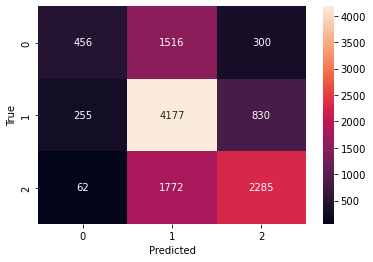

In [29]:
#Optimized model confusion matrix
optimal_cm = confusion_matrix(y_test, optimal_y_pred)
sns.heatmap(optimal_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
#Understanding from this after retraining there hasnt been any significant change in the results from the model 
#Therefore we will perform deeper error analysis

#Adding predictions to the original dataframe
data['predicted'] = optimal_clf.predict(tfidf_df)

In [31]:
#Filter out the misclassified examples
misclassified = data[data['label'] != data['predicted']]

In [32]:
#Print out some of the misclassified examples to analyze
print(misclassified[['text', 'label', 'predicted']].sample(20))

                                                    text  label  predicted
47523  Hillary’s hordes step up violent anti Trump ri...     -1          0
20390  Nirvana was scheduled to headline Lollapalooza...     -1          1
44937  Saudi Arabia sentences woman to death by stoni...     -1          0
34877  Tomorrow I will be in Nashville wearing a too ...      1          0
49094  Where's @UN #hamas is a terrorist group! @real...     -1          0
47603  The truth is out there: there is a wall on the...     -1          0
43499  Kendrick Lamar became the 2nd most nominated a...      1          0
56133  *** COURTESY POST - URGENT - RESCUE ONLY ***In...     -1          0
33537  @FixYourEq Gay marriage may not be your cup of...      0         -1
39947  I can't wait to take Bentley with me to work t...      0          1
47010      #GilmoreGirlsTop4 Kirk, Sookie, Luke and Jess      1          0
25065  I don't get the panic at all. Still in playoff...      1          0
15111  @DTSB16 I could pr

In [33]:
#Next lets perform feature engineering with n-grams
#Here we add bi-grams to the TF-IDF features to capture more context which could help improve the models performance

#Re-create the TF-IDF vectorizer to include bi-grams
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

In [34]:
#Fit the vectoirzer on the cleaned text and transform using the TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [35]:
#Split the data again because we have changed the features above
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['label'], test_size=0.2, random_state=42)

In [36]:
#Re-train the model
optimal_clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [37]:
#Evalate the model with bigrams
y_pred = optimal_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.20      0.29      2272
           0       0.56      0.79      0.65      5262
           1       0.65      0.54      0.59      4119

    accuracy                           0.58     11653
   macro avg       0.59      0.51      0.51     11653
weighted avg       0.59      0.58      0.56     11653



In [38]:
#By this point we have realized that the naive bayes model isnt working as expected so we will experiment on a Logistc regression model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

In [41]:
#Train the model
log_reg.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [42]:
#Make predictions and evaluate the model
y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

          -1       0.56      0.34      0.42      2272
           0       0.58      0.75      0.66      5262
           1       0.67      0.58      0.62      4119

    accuracy                           0.61     11653
   macro avg       0.60      0.55      0.57     11653
weighted avg       0.61      0.61      0.60     11653



In [43]:
#Now lets use cross validation to ensure the models stability across different data splits
from sklearn.model_selection import cross_val_score

In [44]:
#Perform cross-validation and then average the scores
cross_val_scores = cross_val_score(log_reg, tfidf_features, data['label'], cv=5)
print("Average cross-validation score: ", cross_val_scores.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Average cross-validation score:  0.5253150615835428


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#Here since the logistic model failed to converge as the optimization algorithm couldn't find the minimum of the loss function
#with the number of iterations specified by the max_iter parameter


In [46]:
#Therefore lets increase the number of iterations
#Lets increase the max_iter parameter to give the algorithm more iterations to converge

final_model = LogisticRegression(random_state=42, max_iter=1000) 
final_model.fit(tfidf_features, data['label'])

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
#Data scaling step to scale the data since the features have very different scales
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

final_model = LogisticRegression(random_state=42, max_iter=1000)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [48]:
#Now lets also try a different solver by changing the solver parameters
final_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga') #Here we are using the saga solver
final_model.fit(tfidf_features, data['label'])

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

In [49]:
#Now lets perform cross validation again to get results
cross_val_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), tfidf_features, data['label'], cv=5)
print("Average cross-validation score: ", cross_val_scores.mean())

Average cross-validation score:  0.5250404453485293


In [50]:
#By this point we have identified that we are getting a score of 0.525 but there is room for improvement in the models performance

In [142]:
#Lets perform further model tuning
from sklearn.model_selection import GridSearchCV

#Define the parameter grid to search for the best parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Regularization strength
    'solver': ['lgfgs', 'saga'],  #Solvers
    'max_iter': [1000]            #Increase number of iterations
}

#Initialize the grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1)

#Perform the grid search with the training data
grid_search.fit(X_train, y_train)

#Get the best parameters
print("Best Parameters: ", grid_search.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueErr

Best Parameters:  {'C': 1, 'max_iter': 1000, 'solver': 'saga'}


In [51]:
#Now we wil re-evaluate the model with best parameters

#Retrain the model with the best parameters found
best_params = grid_search.best_params_
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_train)

#Re-evaluate the model
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

TypeError: __init__() got an unexpected keyword argument 'alpha'

In [ ]:
#Explore feature engineering - dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  #Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Train and evaluate the model on PCA-transformed data
final_model.fit(X_train_pca, y_train)
y_pred_pca = final_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

In [52]:
#The error above has occured as PCA doesn't support sparse matrix inputs, which are common when using text data transformed by methods like TF-IDF

In [55]:
#Implementing a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4, n_jobs=1)

In [56]:
#Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

#Predict on the test data
rf_predictions = rf_classifier.predict(X_test)

#Evaluate the predictions
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

              precision    recall  f1-score   support

          -1       0.57      0.23      0.33      2272
           0       0.56      0.79      0.65      5262
           1       0.67      0.54      0.60      4119

    accuracy                           0.59     11653
   macro avg       0.60      0.52      0.53     11653
weighted avg       0.60      0.59      0.57     11653

Accuracy:  0.591349866987042


In [79]:
!pip install lightgbm
!pip install --upgrade lightgbm

In [85]:
#Now we could also try with Gradient Boost Machine
import numpy as np
import lightgbm as lgb

#Create the lightGBM data containers
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)

In [86]:
# Set the parameters for the LightGBM model
params = {
    'num_leaves': 38,
    'min_data_in_leaf': 50,
    'objective': 'multiclass',  # Ensure this is 'multiclass' for classification
    'max_depth': -1,
    'learning_rate': 0.1,
    'num_class': 3,   # Update this to the number of classes in your target variable
    'metric': 'multi_logloss',  # Use an appropriate metric for classification
}

In [87]:
# Train the model with the specified parameters and callback for early stopping
model = lgb.train(params,
                  trn_data,
                  num_boost_round=20000,
                  valid_sets=[val_data],  # Use the validation set for early stopping
                  early_stopping_rounds=50,  # This will enable early stopping
                  verbose_eval=50)

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [75]:
pip show lightgbm

Name: lightgbm
Version: 4.3.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)
        
        Copyright (c) Microsoft Corporation
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO 

In [88]:
#From this point onwards lightGBM wouldn't be used to train due to the errors

In [90]:
#We will now try a linear support vector classifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [91]:
#Now lets split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['label'], test_size=0.2, random_state=42)

In [92]:
#Initialize the LinearSVC model
svc_model = LinearSVC(random_state=42)

In [94]:
#Fit the model to the training data
svc_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [97]:
#Predict on the test data 
svc_predictions = svc_model.predict(X_test)

In [98]:
#Evaluate the model
print(classification_report(y_test, svc_predictions))
print("Accuracy: ", accuracy_score(y_test, svc_predictions))

              precision    recall  f1-score   support

          -1       0.56      0.32      0.41      2272
           0       0.58      0.76      0.66      5262
           1       0.66      0.57      0.61      4119

    accuracy                           0.61     11653
   macro avg       0.60      0.55      0.56     11653
weighted avg       0.61      0.61      0.59     11653

Accuracy:  0.605938384965245


In [104]:
#Function to test the model with a review
def predict_sentiment(review):
    # Transform the review using the earlier fitted tfidf_vectorizer
    review_transformed = tfidf_vectorizer.transform([review])
    
    # Use the trained model to make a prediction
    prediction = svc_model.predict(review_transformed)
    
    # Map the prediction to the sentiment label
    sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
    sentiment = sentiment_map[prediction[0]]
    
    return sentiment

# Example usage:
new_review = "My name is on a list"
print(predict_sentiment(new_review))  # Output: 'Positive'

Neutral


In [106]:
#Lets once again adjust the TF-IDF vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.5)
tfidf_features = tfidf_vectorizer.fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['label'], test_size=0.2, random_state=42)

svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

              precision    recall  f1-score   support

          -1       0.64      0.48      0.55      2272
           0       0.62      0.71      0.66      5262
           1       0.68      0.64      0.66      4119

    accuracy                           0.64     11653
   macro avg       0.64      0.61      0.62     11653
weighted avg       0.64      0.64      0.64     11653

Accuracy: 0.6409508281129322


In [109]:
#Hyperparameter tuning of the model using GridSearchCV to find the optimum c parameter in the LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid for 'C' and 'max_iter'
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000]  # Increased number of iterations
}

# Initialize the GridSearchCV with the LinearSVC model and the defined parameter grid
grid_search = GridSearchCV(LinearSVC(random_state=42), param_grid, cv=5, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_svc_model = grid_search.best_estimator_

# Make predictions with the best model
best_svc_predictions = best_svc_model.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, best_svc_predictions))
print("Accuracy:", accuracy_score(y_test, best_svc_predictions))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

              precision    recall  f1-score   support

          -1       0.70      0.35      0.47      2272
           0       0.61      0.80      0.69      5262
           1       0.71      0.61      0.66      4119

    accuracy                           0.65     11653
   macro avg       0.67      0.59      0.60     11653
weighted avg       0.66      0.65      0.63     11653

Accuracy: 0.6457564575645757


In [110]:
#For the moment lets retrain the svc model on the entire dataset
final_svc_model = LinearSVC(C=best_svc_model.C, max_iter=10000, random_state=42)
final_svc_model.fit(tfidf_features, data['label'])

LinearSVC(C=0.1, max_iter=10000, random_state=42)

In [111]:
print(classification_report(y_test, best_svc_predictions))
print("Accuracy:", accuracy_score(y_test, best_svc_predictions))

              precision    recall  f1-score   support

          -1       0.70      0.35      0.47      2272
           0       0.61      0.80      0.69      5262
           1       0.71      0.61      0.66      4119

    accuracy                           0.65     11653
   macro avg       0.67      0.59      0.60     11653
weighted avg       0.66      0.65      0.63     11653

Accuracy: 0.6457564575645757


In [119]:
#Serialize the model and the vectorizer

import joblib

# Save the model
joblib.dump(final_svc_model, 'final_svc_model.joblib')

# Save the vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [117]:
import os

#print the current directory
print(os.getcwd())

C:\Users\DELL
